### Dicom coregistration using SimpleITK
This shows how to use sitk to perform coregistration on dicom data. Note that 

In [1]:
import sys
import numpy as np
import os
from os.path import abspath

import matplotlib.pyplot as plt
%matplotlib inline

import subtle.subtle_preprocess as supre
import subtle.subtle_plot as suplot
import subtle.subtle_io as suio

import SimpleITK as sitk

/home/jon/anaconda/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# specify paths to the dicoms.
# Use either base_path and get_dicom_dirs,
# or just specify them as path_zero, path_low, path_high

base_path = '/home/subtle/Data/Tiantan/NO29'
path_zero, path_low, path_high = suio.get_dicom_dirs(base_path, override=True)

print(path_zero, path_low, path_high)

/home/subtle/Data/Tiantan/NO29/3DT1WMPRAGE_SAG_CS4_301 /home/subtle/Data/Tiantan/NO29/3DT1WMPRAGE_SAG_CS4_601 /home/subtle/Data/Tiantan/NO29/3DT1WMPRAGE_SAG_CS4_701


In [3]:
# load dicom files and headers
im0, hd0 = suio.dicom_files(path_zero, normalize=False)
im1, hd1 = suio.dicom_files(path_low, normalize=False)
im2, hd2 = suio.dicom_files(path_high, normalize=False)
print(im0.shape, im1.shape, im2.shape)



pixel_spacing_0 = suio.get_pixel_spacing(hd0)
pixel_spacing_1 = suio.get_pixel_spacing(hd1)
pixel_spacing_2 = suio.get_pixel_spacing(hd2)


(196, 240, 240) (196, 240, 240) (196, 240, 240)


In [4]:
# mask data to help with coregistration
ims = np.stack((im0, im1, im2), axis=1)
mask = supre.mask_im(ims, threshold=.05)
ims = ims * mask
im0, im1, im2 = ims[:,0,...], ims[:,1,...], ims[:,2,...]
del ims

In [5]:
# scale data
# this is left out as it depends on the source of the dicoms

In [6]:
# run coregistration using sitk
spars = sitk.GetDefaultParameterMap('rigid')
im1_reg, p1_reg = supre.register_im(im0, im1, param_map=spars, 
                                    verbose=True, 
                                    im_fixed_spacing=pixel_spacing_0, 
                                    im_moving_spacing=pixel_spacing_1)
im2_reg, p2_reg = supre.register_im(im0, im2, param_map=spars, 
                                    verbose=True, 
                                    im_fixed_spacing=pixel_spacing_0, 
                                    im_moving_spacing=pixel_spacing_2)


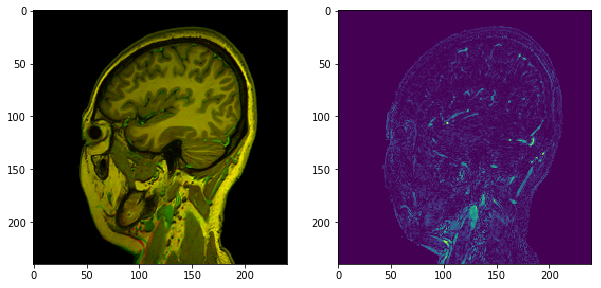

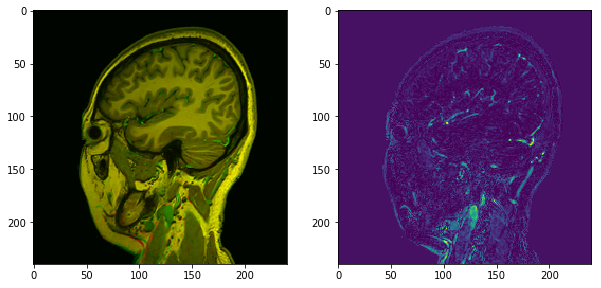

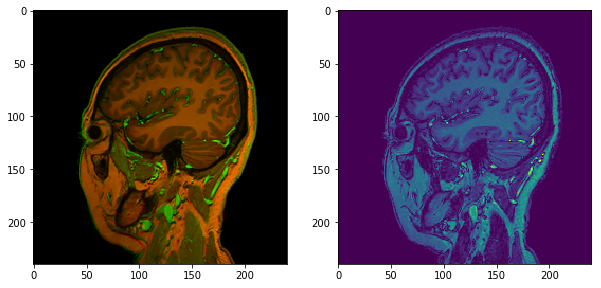

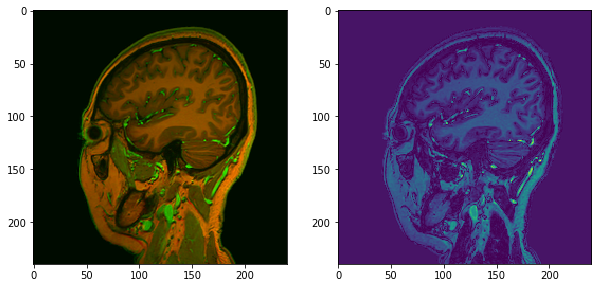

In [7]:
# compare before and after registration
idx=60
plt.figure(figsize=(10,6))
suplot.imshowreg(im0[idx,...], im1[idx,...])
plt.figure(figsize=(10,6))
suplot.imshowreg(im0[idx,...], im1_reg[idx,...])

plt.figure(figsize=(10,6))
suplot.imshowreg(im0[idx,...], im2[idx,...])
plt.figure(figsize=(10,6))
suplot.imshowreg(im0[idx,...], im2_reg[idx,...])
